## Install and Import Libraries

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set(style='whitegrid')


## Data Cleaning and Preparation

In [30]:
# Load the data from the provided Excel file
file_path = '/Users/ging/Documents/Data Analytics Course/GHG Emissions Worldwide/02 Data/Original Data/GHG_Emissions_World_Sector_Country.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe
data.head()

# Drop rows with any missing values
data_cleaned = data.dropna()

# Remove categorical columns
data_cleaned = data_cleaned.drop(columns=['GHG', 'Sector', 'EDGAR Country Code', 'Country'])

# Display the cleaned data
data_cleaned.head()


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,0.113300,0.113300,0.113300,0.113300,0.113614,0.112514,0.127757,0.135143,0.169557,0.167986,...,0.032738,0.056624,0.058719,0.049605,0.056676,0.048976,0.069405,0.063067,0.063936,0.064880
2,0.104343,0.104343,0.104343,0.104343,0.087214,0.077314,0.070086,0.111100,0.118014,0.137814,...,0.999167,1.145152,0.892257,1.359547,1.278200,1.636119,1.703062,1.925471,2.108103,2.323375
4,0.311143,0.311143,0.311143,0.311143,0.311143,0.268190,0.246714,0.230633,0.265571,0.332619,...,2.128866,2.182924,2.291771,2.505224,2.641204,2.155371,2.290200,2.433043,2.452371,2.471969
5,0.006443,0.006443,0.006443,0.006443,0.005186,0.005029,0.005186,0.004557,0.004086,0.003929,...,0.060343,0.062857,0.081138,0.071500,0.066419,0.054110,0.052852,0.051543,0.049973,0.048303
6,0.041466,0.041466,0.041466,0.041466,0.044975,0.044975,0.047574,0.053364,0.054672,0.056234,...,0.058824,0.105076,0.102771,0.095910,0.132314,0.162486,0.241319,0.261171,0.266703,0.273218


## Standardize the Data

In [31]:
# Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_cleaned)

# Convert the standardized data back to a dataframe
data_standardized_df = pd.DataFrame(data_standardized, columns=data_cleaned.columns)

# Display the standardized data
data_standardized_df.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,-0.133300,-0.135141,-0.134035,-0.135260,-0.137289,-0.138806,-0.137610,-0.136451,-0.137160,-0.138834,...,-0.109146,-0.108662,-0.110947,-0.111296,-0.110585,-0.107638,-0.106351,-0.102688,-0.100741,-0.100999
1,-0.133524,-0.135368,-0.134251,-0.135468,-0.137912,-0.139643,-0.138916,-0.136978,-0.138278,-0.139480,...,-0.099581,-0.097992,-0.102587,-0.098180,-0.098628,-0.092869,-0.091346,-0.085541,-0.083127,-0.081755
2,-0.128347,-0.130138,-0.129259,-0.130663,-0.132632,-0.135104,-0.134917,-0.134357,-0.135077,-0.135306,...,-0.088401,-0.087819,-0.088551,-0.086709,-0.085286,-0.088037,-0.085953,-0.080868,-0.080160,-0.080489
3,-0.135975,-0.137844,-0.136615,-0.137743,-0.139846,-0.141362,-0.140386,-0.139315,-0.140750,-0.142349,...,-0.108872,-0.108601,-0.110722,-0.111077,-0.110490,-0.107590,-0.106503,-0.102794,-0.100862,-0.101141
4,-0.135098,-0.136958,-0.135769,-0.136929,-0.138908,-0.140412,-0.139426,-0.138245,-0.139653,-0.141228,...,-0.108887,-0.108187,-0.110505,-0.110833,-0.109845,-0.106582,-0.104772,-0.100864,-0.098994,-0.099224


## Determine the Optimal Number of Clusters using the Elbow Method

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Applications/an

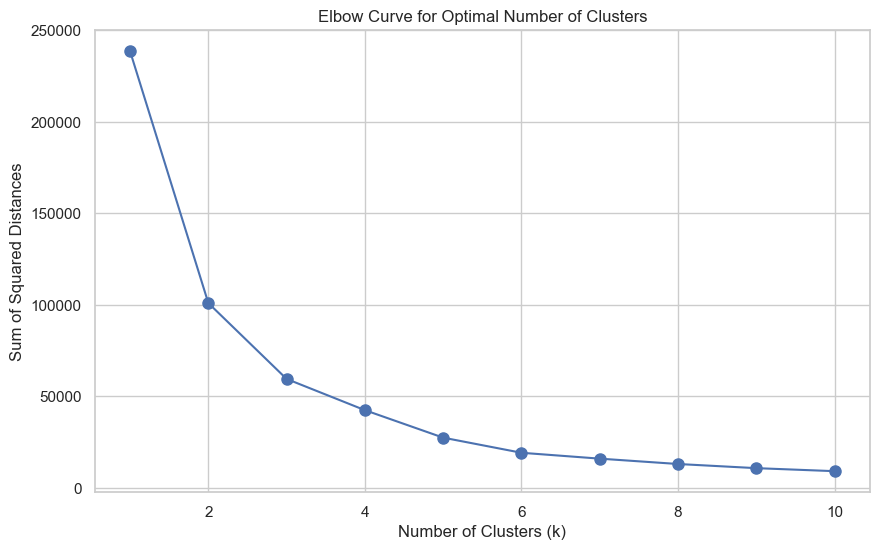

In [32]:
# Define the range for the number of clusters
k_range = range(1, 11)

# Calculate the sum of squared distances for each number of clusters
ssd = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_standardized_df)
    ssd.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, ssd, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Curve for Optimal Number of Clusters')
plt.show()


## Choose the Optimal Number of Clusters - The elbow curve shows a significant decrease in the sum of squared distances when moving from 1 to 3 clusters. After 3 clusters, the decrease in the sum of squared distances becomes more gradual. Therefore, the optimal number of clusters appears to be 3, as this is where the "elbow" of the curve is located.


## Apply k-Means Clustering

In [33]:
# Create the k-means object with the optimal number of clusters
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the k-means algorithm to the standardized data
kmeans.fit(data_standardized_df)

# Attach a new column to the original dataframe with the resulting clusters
data_cleaned['Cluster'] = kmeans.labels_

# Display the dataframe with the cluster assignments
data_cleaned.head()


/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Cluster
1,0.113300,0.113300,0.113300,0.113300,0.113614,0.112514,0.127757,0.135143,0.169557,0.167986,...,0.056624,0.058719,0.049605,0.056676,0.048976,0.069405,0.063067,0.063936,0.064880,0
2,0.104343,0.104343,0.104343,0.104343,0.087214,0.077314,0.070086,0.111100,0.118014,0.137814,...,1.145152,0.892257,1.359547,1.278200,1.636119,1.703062,1.925471,2.108103,2.323375,0
4,0.311143,0.311143,0.311143,0.311143,0.311143,0.268190,0.246714,0.230633,0.265571,0.332619,...,2.182924,2.291771,2.505224,2.641204,2.155371,2.290200,2.433043,2.452371,2.471969,0
5,0.006443,0.006443,0.006443,0.006443,0.005186,0.005029,0.005186,0.004557,0.004086,0.003929,...,0.062857,0.081138,0.071500,0.066419,0.054110,0.052852,0.051543,0.049973,0.048303,0
6,0.041466,0.041466,0.041466,0.041466,0.044975,0.044975,0.047574,0.053364,0.054672,0.056234,...,0.105076,0.102771,0.095910,0.132314,0.162486,0.241319,0.261171,0.266703,0.273218,0


## Visualize the Clusters


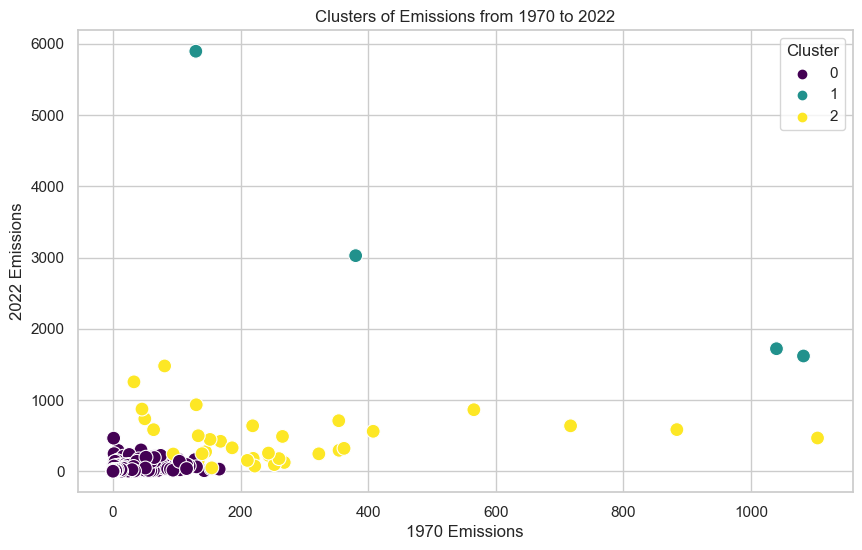

In [34]:
# Scatterplot of two variables colored by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_cleaned['1970'], y=data_cleaned['2022'], hue=data_cleaned['Cluster'], palette='viridis', s=100)
plt.xlabel('1970 Emissions')
plt.ylabel('2022 Emissions')
plt.title('Clusters of Emissions from 1970 to 2022')
plt.show()


## Interpretation of Results

The scatterplot visualizes the clusters formed by the k-means algorithm using the GHG emissions data from 1970 to 2022. Here's a detailed interpretation of the clusters:

Cluster 0 (Dark Purple)

Characteristics: This cluster is densely populated with data points having relatively low emissions in both 1970 and 2022.

Emissions Range: Emissions are generally below 200 units in 1970 and below 1000 units in 2022.

Interpretation: These countries have consistently low GHG emissions over the years. They might represent smaller or less industrialized countries with minimal contributions to global GHG emissions.

Cluster 1 (Teal)

Characteristics: This cluster has fewer data points, representing countries with moderate emissions in both 1970 and 2022.

Emissions Range: Emissions range from approximately 200 to 1000 units in 1970 and from 2000 to 6000 units in 2022.

Interpretation: These countries might have experienced significant industrial growth, leading to a substantial increase in GHG emissions over the years. They are likely mid-sized countries with growing industrial activities.

Cluster 2 (Yellow)

Characteristics: This cluster contains countries with a wide range of emissions in 1970 but high emissions in 2022.

Emissions Range: Emissions vary widely in 1970 (up to 1000 units) and are predominantly above 1000 units in 2022.

Interpretation: These countries likely include large, highly industrialized nations that have historically had high emissions and continue to have significant GHG emissions. They may represent the major contributors to global GHG emissions.

## Calculate Descriptive Statistics for the Clusters

In [35]:
# Calculate descriptive statistics for each cluster
cluster_stats = data_cleaned.groupby('Cluster').describe()
cluster_stats


1970                                                              \
          count        mean         std         min         25%         50%   
Cluster                                                                       
0        4463.0    2.816000   11.217977    0.000000    0.001799    0.041657   
1           4.0  658.002922  476.690665  129.827208  317.682956  710.042148   
2          35.0  265.242530  232.925084   32.863804  133.495155  218.887265   

                                     1971              ...         2021  \
                 75%          max   count        mean  ...          75%   
Cluster                                                ...                
0           0.662685   166.386093  4463.0    2.846062  ...     1.957459   
1        1050.362113  1082.100183     4.0  680.567892  ...  3719.195180   
2         295.488874  1104.109385    35.0  261.269653  ...   600.255303   

                        2022                                          \
                 max   count         mean          std           min   
Cluster                                                                
0         440.690288  4463.0     5.737874    21.512298  2.350999e-08   
1        5822.845160     4.0  3065.641860  1993.436601  1.618229e+03   
2        1567.974954    35.0   450.998110   334.423132  4.781045e+01   

                                                             
                 25%          50%          75%          max  
Cluster                                                      
0           0.010433     0.158064     1.985613   464.535875  
1        1694.898597  2373.778314  3744.521577  5896.781595  
2         204.302809   329.065219   611.137155  1478.483887  

[3 rows x 424 columns]

## Interpretation of Descriptive Statistics of the Clusters

1. Cluster 0 (Dark Purple)

Count: 4463 data points
Mean:
1970: 2.82 units
2022: 5.74 units
Standard Deviation (std):
1970: 11.22 units
2022: 21.51 units
Min:
1970: 0.00 units
2022: very close to 0 units
25th Percentile (25%):
1970: 0.002 units
2022: 0.01 units
50th Percentile (Median):
1970: 0.04 units
2022: 0.16 units
75th Percentile (75%):
1970: 0.66 units
2022: 1.99 units
Max:
1970: 166.39 units
2022: 464.54 units

Interpretation:

This cluster has a high number of data points, indicating a large group of countries.
The mean emissions are quite low in both 1970 and 2022, with slight increases over time.
The majority of countries in this cluster have very low emissions, as indicated by the low values at the 25th and 50th percentiles.
There are a few countries with relatively higher emissions, but these are outliers as suggested by the maximum values.

2. Cluster 1 (Teal)

Count: 4 data points
Mean:
1970: 658.00 units
2022: 3065.64 units
Standard Deviation (std):
1970: 476.69 units
2022: 1993.44 units
Min:
1970: 129.83 units
2022: 1618.23 units
25th Percentile (25%):
1970: 317.68 units
2022: 1694.90 units
50th Percentile (Median):
1970: 710.04 units
2022: 2373.78 units
75th Percentile (75%):
1970: 1050.36 units
2022: 3744.52 units
Max:
1970: 1082.10 units
2022: 5896.78 units

Interpretation:

This cluster has very few countries but they have very high emissions.
The mean emissions are significantly higher than those in Cluster 0.
The standard deviations are also quite high, indicating a wide spread in emissions values.
The emissions have increased dramatically from 1970 to 2022, reflecting significant industrial growth or lack of emission control measures.

3. Cluster 2 (Yellow)
Count: 35 data points
Mean:
1970: 265.24 units
2022: 451.00 units
Standard Deviation (std):
1970: 232.93 units
2022: 334.42 units
Min:
1970: 32.86 units
2022: 47.81 units
25th Percentile (25%):
1970: 133.50 units
2022: 204.30 units
50th Percentile (Median):
1970: 218.89 units
2022: 329.07 units
75th Percentile (75%):
1970: 295.49 units
2022: 611.14 units
Max:
1970: 1104.11 units
2022: 1478.48 units

Interpretation:

This cluster includes countries with medium levels of emissions.
The mean emissions in both 1970 and 2022 are higher than Cluster 0 but lower than Cluster 1.
There is a significant spread in emissions values as indicated by the standard deviations.
The emissions have increased over time but not as dramatically as in Cluster 1, suggesting moderate industrial growth and possibly some emission control measures in place.

Insights:

Cluster 0: Represents countries with consistently low emissions over time. These countries likely have less industrial activity and better emission control measures.
Cluster 1: Includes a few countries with extremely high emissions, indicating significant industrialization and possibly lack of stringent emission controls.
Cluster 2: Contains countries with moderate emissions that have increased over time. These countries may be experiencing industrial growth but also have some level of emission control measures.

Future Analysis:

Policy Recommendations: Each cluster can be targeted with different policies based on their emissions levels and trends. For example, Cluster 1 countries might need stringent regulations and support for green technologies.
Trend Analysis: Further analysis can be done to understand the factors driving emissions in each cluster. This can help in forecasting future trends and planning accordingly.
Resource Allocation: Resources for reducing emissions can be allocated based on the needs of each cluster. Cluster 0 might need less intervention compared to Cluster 1.
Environmental Impact Studies: Detailed studies can be conducted to understand the environmental impacts of emissions from countries in each cluster. This can help in prioritizing actions for mitigating climate change.